# Face Detection and Alignment with UniFace

This notebook demonstrates face detection and alignment using the **UniFace** library.

## 1. Install UniFace

In [1]:
%pip install -q uniface

Note: you may need to restart the kernel to use updated packages.


## 2. Import Libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import uniface
from uniface.detection import RetinaFace
from uniface.face_utils import face_alignment
from uniface.visualization import draw_detections

print(uniface.__version__)

1.6.0


## 3. Initialize the Detector

In [ ]:
detector = RetinaFace(
    confidence_threshold=0.5,
    nms_threshold=0.4,
)

✓ Model loaded (CoreML (Apple Silicon))


## 4. Load Images and Perform Detection + Alignment

In [4]:
image_paths = [
    '../assets/test_images/image0.jpg',
    '../assets/test_images/image1.jpg',
    '../assets/test_images/image2.jpg',
    '../assets/test_images/image3.jpg',
    '../assets/test_images/image4.jpg',
]

original_images = []
detection_images = []
aligned_images = []

for image_path in image_paths:
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f'Error: Could not read {image_path}')
        continue

    # Detect faces
    faces = detector.detect(image)
    if not faces:
        print(f'No faces detected in {image_path}')
        continue

    # Draw detections
    bbox_image = image.copy()
    bboxes = [f.bbox for f in faces]
    scores = [f.confidence for f in faces]
    landmarks = [f.landmarks for f in faces]
    draw_detections(image=bbox_image, bboxes=bboxes, scores=scores, landmarks=landmarks, vis_threshold=0.6, fancy_bbox=True)

    # Align first detected face (returns aligned image and inverse transform matrix)
    first_landmarks = faces[0].landmarks
    aligned_image, _ = face_alignment(image, first_landmarks, image_size=112)

    # Convert BGR to RGB for visualization
    original_images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    detection_images.append(cv2.cvtColor(bbox_image, cv2.COLOR_BGR2RGB))
    aligned_images.append(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))

print(f'Processed {len(original_images)} images')

Processed 5 images


## 5. Visualize Results

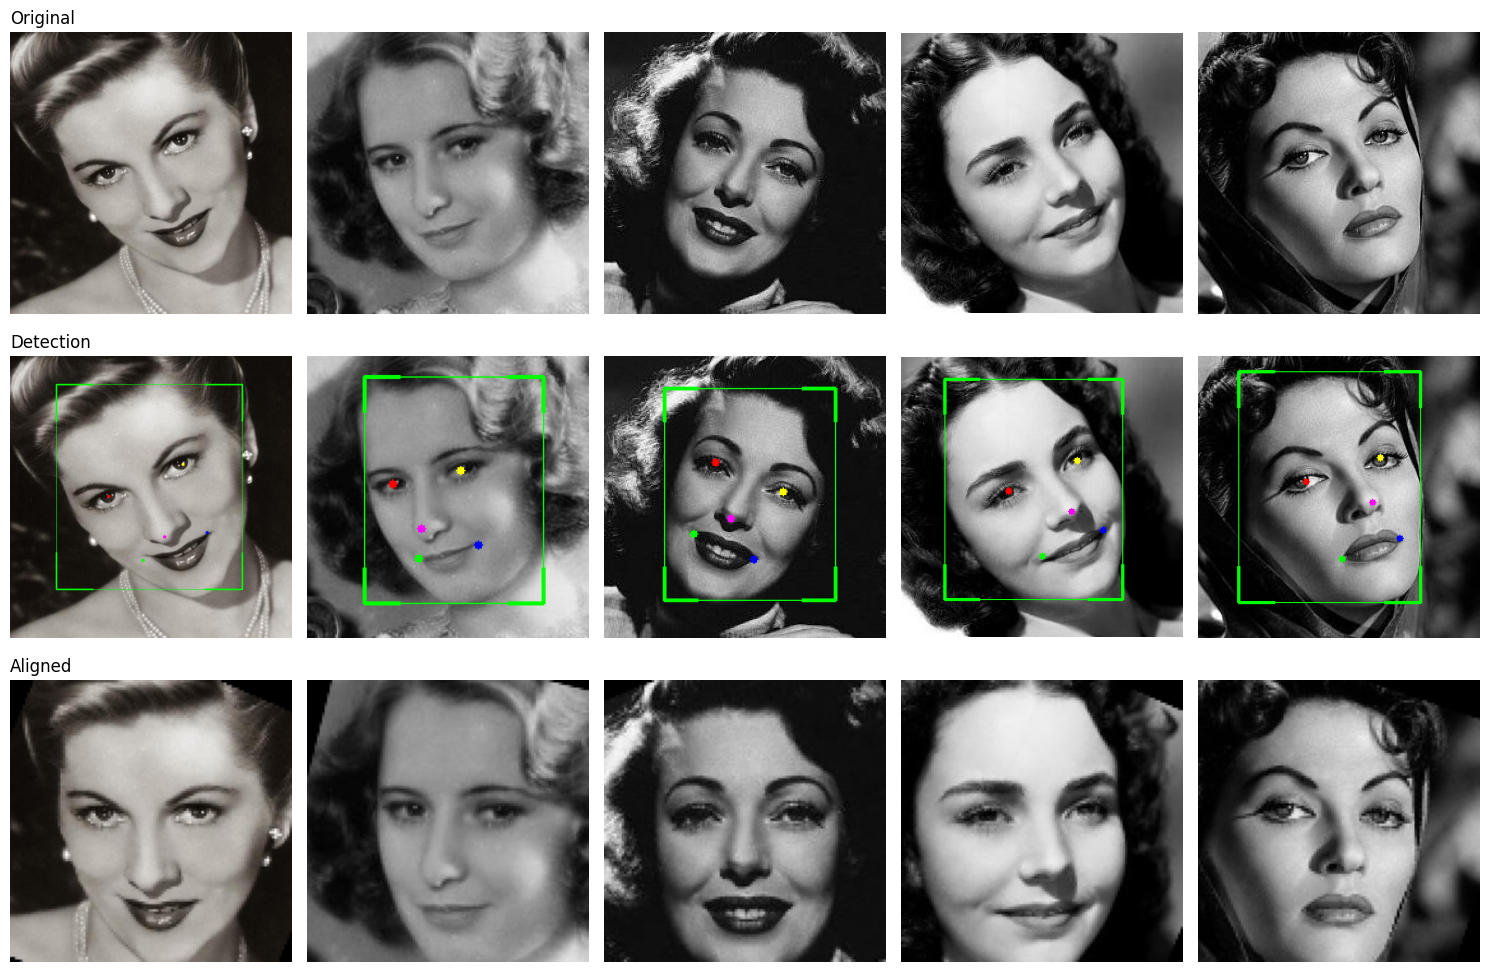

In [5]:
fig, axes = plt.subplots(3, len(original_images), figsize=(15, 10))

row_titles = ['Original', 'Detection', 'Aligned']

for row, images in enumerate([original_images, detection_images, aligned_images]):
    for col, img in enumerate(images):
        axes[row, col].imshow(img)
        axes[row, col].axis('off')
        if col == 0:
            axes[row, col].set_title(row_titles[row], fontsize=12, loc='left')

plt.tight_layout()
plt.show()

## Notes

- `detect()` returns a list of `Face` objects with `bbox`, `confidence`, `landmarks` attributes
- Access attributes using dot notation: `face.bbox`, `face.landmarks`
- `face_alignment()` uses 5-point landmarks to align and crop the face
- Default output size is 112x112 (standard for face recognition models)
